In [1]:
#import magic and libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
#import data set and clean up
charity = pd.read_csv('Charity.csv')
dummies = pd.get_dummies(charity.RenewalsOrAcq)
charity = pd.concat([charity, dummies], axis=1)
charity.drop(['Renewals'], inplace=True, axis=1)
charity.drop(['dob'], inplace=True, axis=1)
charity.drop(['RenewalsOrAcq'], inplace=True, axis=1)
charity.drop(['suburb'], inplace=True, axis=1)
charity.drop(['state'], inplace=True, axis=1)
charity = charity.dropna(subset=['age'])
charity['age'] = charity['age'].convert_objects(convert_numeric=True)
charity = charity.dropna(subset=['age'])
charity['postcode'] = charity['postcode'].astype(str)
charity.postcode.dtype
charity.head()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,postcode,num_streets,collection_amount,donation_amount,total_received,age,weekends,Acq
0,801,2,315.00,0,315.00,72,4,0
1,801,6,303.55,0,303.55,65,4,1
2,804,4,250.00,0,250.00,80,4,0
3,804,2,28.60,50,78.60,57,4,0
5,810,2,521.50,0,521.50,67,4,1


In [3]:
#have a look at the data
charity.describe(include='all')

,postcode,num_streets,collection_amount,donation_amount,total_received,age,weekends,Acq
count,26597,26597.000000,26597.000000,26597.000000,26597.000000,26597.000000,26597.000000,26597.000000
unique,1772,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,4350,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,230,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.881716,77.967018,3.738053,81.705071,62.471858,3.352859,0.613979
std,NaN,2.548462,71.066831,18.735377,70.878127,14.066151,0.870711,0.486845
min,NaN,0.000000,-414.950000,-150.000000,-500.000000,0.000000,2.000000,0.000000
25%,NaN,1.000000,37.000000,0.000000,40.000000,54.000000,2.000000,0.000000
50%,NaN,2.000000,61.000000,0.000000,64.000000,65.000000,4.000000,1.000000
75%,NaN,3.000000,100.000000,0.000000,101.300000,72.000000,4.000000,1.000000


In [4]:
#look for any correlations
charity.corr()

,num_streets,collection_amount,donation_amount,total_received,age,weekends,Acq
num_streets,1.000000,-0.020782,-0.011124,-0.023778,-0.005437,0.020047,0.058324
collection_amount,-0.020782,1.000000,-0.141874,0.965161,0.176009,0.091123,-0.174396
donation_amount,-0.011124,-0.141874,1.000000,0.122081,0.041046,0.046338,0.032654
total_received,-0.023778,0.965161,0.122081,1.000000,0.187327,0.103615,-0.166229
age,-0.005437,0.176009,0.041046,0.187327,1.000000,0.124830,-0.117583
weekends,0.020047,0.091123,0.046338,0.103615,0.124830,1.000000,-0.054035
Acq,0.058324,-0.174396,0.032654,-0.166229,-0.117583,-0.054035,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11319f050>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x119c6ee10>]], dtype=object)

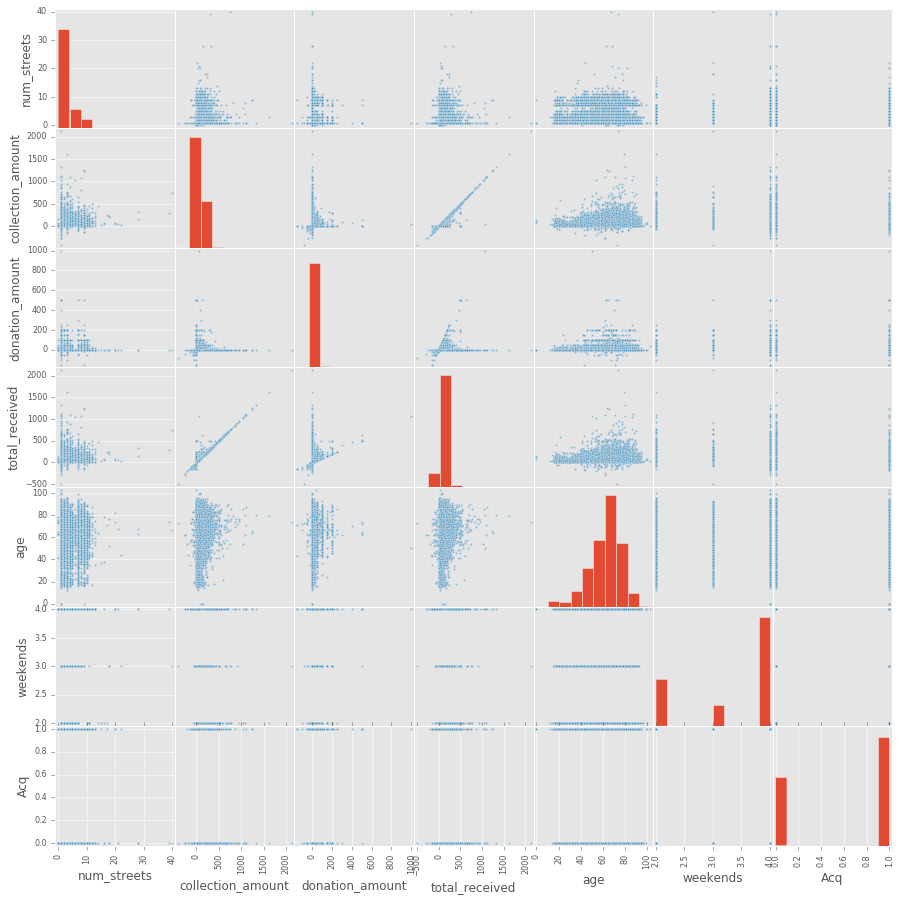

In [5]:
#create scatter matrix
pd.scatter_matrix(charity, figsize=(15,15))

In [6]:
# create a fitted model in one line
import statsmodels.formula.api as smf
lm = smf.ols(formula='total_received ~ age + num_streets', data=charity).fit()

# print the coefficients
lm.params

Intercept      24.599394
age             0.943302
num_streets    -0.633013
dtype: float64

In [7]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         total_received   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     491.0
Date:                Sat, 21 May 2016   Prob (F-statistic):          4.08e-210
Time:                        13:52:31   Log-Likelihood:            -1.5059e+05
No. Observations:               26597   AIC:                         3.012e+05
Df Residuals:                   26594   BIC:                         3.012e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      24.5994      2.005     12.271      0.000        20.670    28.529
age             0.9433      0.030     31.087      0.000         0.884     1.003
num_streets    -0.6330      0.167     -3.780      0.000        -0.961    -0.305
==============================================================================
Omnibus:                    28073.110   Durbin-Watson:                   1.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5391253.213
Skew:                           4.946   Prob(JB):                         0.00
Kurtosis:                      72.043   Cond. No.                         301.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# Let's try just the total collected
# create a fitted model in one line
lm = smf.ols(formula='total_received ~ collection_amount ', data=charity).fit()

# print the coefficients
lm.params

Intercept            6.654197
collection_amount    0.962598
dtype: float64

In [9]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         total_received   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 3.619e+05
Date:                Sat, 21 May 2016   Prob (F-statistic):               0.00
Time:                        13:52:31   Log-Likelihood:            -1.1541e+05
No. Observations:               26597   AIC:                         2.308e+05
Df Residuals:                   26595   BIC:                         2.308e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             6.6542      0.169     39.417      0.000         6.323     6.985
collection_amount     0.9626      0.002    601.540      0.000         0.959     0.966
==============================================================================
Omnibus:                    50198.576   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        225855372.228
Skew:                          14.109   Prob(JB):                         0.00
Kurtosis:                     453.562   Cond. No.                         157.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

feature_cols = ['age', 'num_streets', 'weekends', 'Acq', 'postcode']
X = charity[feature_cols]
y = charity.total_received
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred_class = linreg.predict(X_test)
from sklearn import metrics
print metrics.r2_score(y_test, y_pred_class)


0.0637056411947


In [11]:
#add in ATO data and see if I can improve my model
tax = pd.read_csv('2014tax.csv')
tax['postcode'] = tax['postcode'].astype(str)
charity_new = pd.merge(charity, tax, on='postcode')
charity_new.head()
print charity_new.columns



Index([u'postcode', u'num_streets', u'collection_amount', u'donation_amount',
       u'total_received', u'age', u'weekends', u'Acq',
       u'Number of individuals', u'Taxable income or loss3\rno.',
       ...
       u'Australian superannuation income stream tax offset\rno.',
       u'Australian superannuation income stream tax offset\r$',
       u'Net medical expenses over the threshold amount tax offset\rno.',
       u'Net medical expenses over the threshold amount tax offset\r$',
       u'Low income tax offset\rno.', u'Low income tax offset\r$',
       u'Mature age worker tax offset\rno.',
       u'Mature age worker tax offset\r$',
       u'Termination payment tax offset\rno.',
       u'Termination payment tax offset\r$'],
      dtype='object', length=139)


In [18]:
feature_cols = ['age', 'num_streets', 'weekends', 'Acq', 'postcode', 'Number of individuals', 'Gifts or donations\r$']
X = charity_new[feature_cols]
y = charity_new.total_received
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred_class = linreg.predict(X_test)
from sklearn import metrics
print metrics.r2_score(y_test, y_pred_class)

0.0873534576726


In [19]:
#X = charity_new.filter(regex="[^total_received|^collection_amount|^donation_amount]")
X = charity_new.filter(regex="[^total_received|^collection_amount]")
y = charity_new.total_received
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred_class = linreg.predict(X_test)
from sklearn import metrics
print metrics.r2_score(y_test, y_pred_class)

0.0966399229821


In [22]:
# evaluate the model using 10-fold cross-validation
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(LinearRegression(), X, y, scoring='r2', cv=100)
print scores
print scores.mean()

[ -1.52430881e+02   1.25366304e-02  -5.35846716e-02   4.35836555e-02
   4.64264721e-02   4.70729673e-02   7.01510068e-02   5.29410585e-02
  -3.02581986e-03  -2.23628786e-02   3.14495207e-02   5.90377584e-02
   6.16471257e-03   2.43050201e-02   8.36398876e-02   4.19411282e-02
   3.77130264e-02   7.03696822e-02   2.58376399e-04   6.90912247e-02
   1.20551271e-02  -1.75696180e-01   4.65565877e-02   3.35169172e-02
   1.03741915e-01   1.14689374e-02   3.35360990e-02  -1.24464410e-02
   2.83316940e-02   1.33533101e-01  -1.00340064e-02  -1.43240119e-01
   6.06060629e-02   6.05516529e-02   4.77595400e-03   7.31414261e-02
   3.92053157e-02  -1.34698881e-01   1.06965012e-02   1.30655231e-01
   4.11967919e-02   9.89075258e-02   4.87166791e-02   7.98284548e-02
   5.83762708e-02  -1.56427017e-03   7.95271332e-02   5.95659172e-02
  -3.63310959e-04  -3.28601064e-01  -4.46557311e-02  -2.31390430e-02
   6.65657072e-02   2.51030663e-02   2.47413598e-02  -4.24742799e-01
   3.58576539e-02   1.14961132e-02

In [25]:
#this is really bad - linear regression not really doing it for me..

AttributeError: 'LinearRegression' object has no attribute 'summary'

In [ ]:
#K means clustering
from sklearn.cluster import KMeans

np.random.seed(0)

est = KMeans(n_clusters=3, init='random')
est.fit(charity)
y_kmeans = est.predict(charity)



In [ ]:
#plot the clusters
colors = np.array(['#FF0054','#FBD039','#23C2BC','#23C2BC'])
plt.figure()
charity.plot(kind='scatter', x='age', y='total_received',c=colors[y_kmeans])

In [ ]:
#Try Decision Trees
from sklearn import tree
from sklearn.cross_validation import train_test_split
from sklearn import metrics

In [ ]:
#split data up for training
charity = d['Survived'].copy(deep=True)
del d['Survived']

d

In [ ]:
y = charity.array('total_received')
print y

In [ ]:
X = charity
#X.drop('total_received', axis=1, inplace=True)
#X.drop('collection_amount', axis=1, inplace=True)
#X.drop('donation_amount', axis=1, inplace=True)
#y = X.total_received()
X.describe(include='all')

In [ ]:
#PCA Analysis
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets

pca = decomposition.PCA(n_components=1)
X_r = pca.fit_transform(X)

y = charity.total_received()

plt.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('PCA(2 components) of IRIS dataset')

In [ ]:
from sklearn import svm
from sklearn.datasets import samples_generator
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.pipeline import Pipeline
# generate some data to play with
#X, y = samples_generator.make_classification(
# n_informative=5, n_redundant=0, random_state=42)
# ANOVA SVM-C
#anova_filter = SelectKBest(f_regression, k=5)
#clf = svm.SVC(kernel='linear')
#anova_svm = Pipeline([('anova', anova_filter), ('svc', clf)])
>>> # You can set the parameters using the names issued
>>> # For instance, fit using a k of 10 in the SelectKBest
>>> # and a parameter 'C' of the svm
>>> anova_svm.set_params(anova__k=10, svc__C=.1).fit(X, y)
...                                              
Pipeline(steps=[...])
>>> prediction = anova_svm.predict(X)
>>> anova_svm.score(X, y)                        
0.77...
>>> # getting the selected features chosen by anova_filter
>>> anova_svm.named_steps['anova'].get_support()
... 
array([ True,  True,  True, False, False,  True, False,  True,  True, True,
       False, False,  True, False,  True, False, False, False, False,
       True], dtype=bool)